<br><font color='darkgreen' size=8><u>Ridge & Lasso Regression</u></font>

# <font color='navy'><u>Problem Statement</u></font>

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. 

We are required to build a regression model using regularisation (l1 norm & l2 norm) in order to predict the actual value of the prospective properties and decide whether to invest in them or not. We have to identify the following 

- which features are significant in predicting the price of a house
- how well those features describe the price of a house
- optimal value of strength of penalty (λ) for ridge and lasso

# <font color='navy'><u>Exploratory Data Analysis</u></font>

In [1]:
#importing libraries to perform EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading the data csv and converting it into a dataframe
df=pd.read_csv('train.csv')

#quick peek into the dataframe
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Refer data dictionary <font color='grey'>(provided separately)</font> to completely understand various features and their values in the above dataframe

In [3]:
# checking the datatypes in this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are some columns having very high number of nulls and also majority of the columns are of <b>object</b> dtype hence we need to do dtype conversions or apply some other data preprocessing techniques

In [4]:
# checking the statistical summary of the dataframe
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<font color='red'><b>Id</b></font> is merely an unique identification number for each entry and it does not play any role in predicting the <font color='darkgreen'><b>SalePrice</b></font>, hence we're going to drop it.

In [5]:
df.drop('Id', axis=1, inplace=True)

Let us now find columns having highest number of nulls

In [6]:
(100*(df.isnull().sum()/df.shape[0])).sort_values(ascending=False)[:20]

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
MSSubClass       0.000000
dtype: float64

The above is a list of features with their respective null values (%) in descending order. But if we read the <font color='navy'><b>data dictionary</b></font> carefully, we'll realize that in almost all of the above listed features, it was stated that <font color='red'><b>NaN</b></font>s are not actual missing values, it merely denotes that particular entry <font color='grey'>(house)</font> doesn't have that particular feature. So the best way to treat <font color='red'><b>NaN</b></font>s in these columns is to fill them up with some string such as '<font color='darkgreen'><b>None</b></font>'.

The only exceptions in the above list are the features <font color='red'><b>LotFrontage</b></font>, <font color='red'><b>Electrical</b></font>, <font color='red'><b>MasVnrType</b></font> and <font color='red'><b>MasVnrArea</b></font> because only for these columns there's no mentioning of how to interpret the <font color='red'><b>NaN</b></font>s. So we can assume that in these columns <font color='red'><b>NaN</b></font>s are truly missing values and we'll have to come up with a strategy to treat them.

<font color='red'><b>Electrical</b></font>, <font color='red'><b>MasVnrType</b></font> and <font color='red'><b>MasVnrArea</b></font> are fairly easy to deal with, because less than <b>1%</b> of the dataset has nulls. So we can afford to remove those entries from our dataframe. But <font color='red'><b>LotFrontage</b></font> has <b>17.73%</b> missing values, we can't afford to delete such huge proportion of our particularly small dataset, lets do further analysis of this feature and determine whether we can impute the missing values or if we should drop the feature itself.

In [7]:
# statistical summary of 'LotFrontage'
df[['LotFrontage']].describe()

,LotFrontage
count,1201.000000
mean,70.049958
std,24.284752
min,21.000000
25%,59.000000
50%,69.000000
75%,80.000000
max,313.000000


<font color='red'><b>LotFrontage</b></font> has mean and median around <b>70</b>, but the standard deviation is around <b>24</b>, which means that considering even 1 standard deviation of either side will result in an interval as wide as <b>[46,94]</b>. Hence we cannot properly justify imputing the missing values with the mean, so we are going to drop this feature from our dataframe.

In [8]:
# dropping LotFrontage feature
df.drop('LotFrontage',axis=1,inplace=True)

In [9]:
# dropping entries with null values for Electrical
df=df[~df.Electrical.isna()]

In [10]:
# dropping entries with null values for MasVnrType
df=df[~df.MasVnrType.isna()]

In [11]:
# dropping entries with null values for MasVnrArea
df=df[~df.MasVnrArea.isna()]

In [12]:
# finding features that still has nulls
null_features=((df.isna().sum()>0).index)[df.isna().sum()>0]
df[null_features].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Alley         90 non-null     object 
 1   BsmtQual      1414 non-null   object 
 2   BsmtCond      1414 non-null   object 
 3   BsmtExposure  1413 non-null   object 
 4   BsmtFinType1  1414 non-null   object 
 5   BsmtFinType2  1413 non-null   object 
 6   FireplaceQu   766 non-null    object 
 7   GarageType    1370 non-null   object 
 8   GarageYrBlt   1370 non-null   float64
 9   GarageFinish  1370 non-null   object 
 10  GarageQual    1370 non-null   object 
 11  GarageCond    1370 non-null   object 
 12  PoolQC        7 non-null      object 
 13  Fence         281 non-null    object 
 14  MiscFeature   54 non-null     object 
dtypes: float64(1), object(14)
memory usage: 181.4+ KB


As clearly stated in the <font color='navy'><b>data dictionary</b></font>, <font color='red'><b>NaN</b></font>s are not truly missing values, it simply indicates the absence of that particular facility. Hence we're going to replace all <font color='red'><b>NaN</b></font>s in all these columns with the string '<font color='darkgreen'><b>None</b></font>'. The only exception is <font color='red'><b>GarageYrBlt</b></font>, because thats the only numerical feature in the above list and replacing it with <font color='darkgreen'><b>0</b></font> or absolutely anything else is very unreasonable. Hence we choose to drop this feature. 

In [13]:
# dropping GarageYrBlt feature
df.drop('GarageYrBlt',axis=1,inplace=True)

In [14]:
# filling NaN with 'None'
df.fillna('None', inplace=True)

In [15]:
# checking for NaN
df.isna().sum().sum()

0

We have successfully removed all the <font color='red'><b>NaN</b></font>s by appropriate methods

In [16]:
df.duplicated().sum()

0

There are no duplicated records in our dataframe

# <font color='navy'><u>Data Preprocessing & Further Analysis</u></font>
From the problem statement, it is clear that <font color='darkgreen'><b>SalePrice</b></font> is the target variable. In this segment we are going to perform further statistical analysis and plot relevant graphs to understand the important influencing factors of the <font color='darkgreen'><b>SalePrice</b></font>. Before that we need to preprocess ordinal variables, nominal variables etc and some of the variables might look like numerical variables but if we read the data dictionary we'll realize that they're actually nominal variables for example <font color='darkviolet'><b>MSSubClass</b></font>.

In [17]:
# converting MSSubClass to string
df.MSSubClass=df.MSSubClass.astype(str)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1451 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1451 non-null   object 
 1   MSZoning       1451 non-null   object 
 2   LotArea        1451 non-null   int64  
 3   Street         1451 non-null   object 
 4   Alley          1451 non-null   object 
 5   LotShape       1451 non-null   object 
 6   LandContour    1451 non-null   object 
 7   Utilities      1451 non-null   object 
 8   LotConfig      1451 non-null   object 
 9   LandSlope      1451 non-null   object 
 10  Neighborhood   1451 non-null   object 
 11  Condition1     1451 non-null   object 
 12  Condition2     1451 non-null   object 
 13  BldgType       1451 non-null   object 
 14  HouseStyle     1451 non-null   object 
 15  OverallQual    1451 non-null   int64  
 16  OverallCond    1451 non-null   int64  
 17  YearBuilt      1451 non-null   int64  
 18  YearRemo

# <font color='navy'><u>Ordinal Encoding</u></font>

Many <font color='grey'>(but not all)</font> of the ordinal features have the following classes:
- <b>Ex</b>: Excellent
- <b>Gd</b>: Good
- <b>TA</b>: Average/Typical
- <b>Fa</b>: Fair
- <b>Po</b>: Poor
- <b>None</b>: NaN

Hence we create the following common encoder dictionary for quality-related features and also we create few more dictionaries to handle other types of ordinal features as well.

In [19]:
encode_qual={'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}
encode_path={'None':0, 'Grvl':1, 'Pave':2}
encode_utils={'None':0, 'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}
encode_expo={'None':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4}
encode_finish={'GLQ':6, 'ALQ':5, 'BLQ':4, 'Rec':3, 'LwQ':2, 'Unf':1, 'None':0}
encode_garage={'None':0, 'Unf':1, 'RFn':2, 'Fin':3}
encode_binary={'Y':1, 'N':0}
encode_paved={'N':0, 'P':1, 'Y':2}
encode_func={'Sal':0, 'Sev':1, 'Maj2':2, 'Maj1':3, 'Mod':4, 'Min2':5, 'Min1': 6, 'Typ':6}
encode_fence={'None':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3, 'GdPrv':4}

Now we're going to apply the above encodings on appropriate features

In [20]:
df.Street=df.Street.map(encode_path)
df.Alley=df.Alley.map(encode_path)
df.Utilities=df.Utilities.map(encode_utils)
df.ExterQual=df.ExterQual.map(encode_qual)
df.ExterCond=df.ExterCond.map(encode_qual)
df.BsmtQual=df.BsmtQual.map(encode_qual)
df.BsmtCond=df.BsmtCond.map(encode_qual)
df.BsmtExposure=df.BsmtExposure.map(encode_expo)
df.BsmtFinType1=df.BsmtFinType1.map(encode_finish)
df.BsmtFinType2=df.BsmtFinType2.map(encode_finish)
df.HeatingQC=df.HeatingQC.map(encode_qual)
df.CentralAir=df.CentralAir.map(encode_binary)
df.KitchenQual=df.KitchenQual.map(encode_qual)
df.Functional=df.Functional.map(encode_func)
df.FireplaceQu=df.FireplaceQu.map(encode_qual)
df.GarageFinish=df.GarageFinish.map(encode_garage)
df.GarageQual=df.GarageQual.map(encode_qual)
df.GarageCond=df.GarageCond.map(encode_qual)
df.PavedDrive=df.PavedDrive.map(encode_paved)
df.PoolQC=df.PoolQC.map(encode_qual)
df.Fence=df.Fence.map(encode_fence)

# <font color='navy'><u>One Hot Encoding</u></font>

There are quite a few nominal features in this dataset such as <font color='darkgreen'><b>MSSubClass</b></font>, <font color='darkgreen'><b>MSZoning</b></font> etc where there's no natural ordering. Hence we need to create <b>one-hot encoded vectors</b> of these features, but we're achieving this using <b>pandas get_dummies</b> method and also we have to apply <b>drop_first=True</b> to avoid <b>multicollinearity</b>.

In [21]:
# finding columns with object dtype
object_cols=df.select_dtypes('object')
object_cols.head()

,MSSubClass,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,...,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,MiscFeature,SaleType,SaleCondition
0,60,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal
1,20,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,...,MetalSd,MetalSd,None,CBlock,GasA,SBrkr,Attchd,None,WD,Normal
2,60,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,...,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal
3,70,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,...,Wd Sdng,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,None,WD,Abnorml
4,60,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,...,VinylSd,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal


In [22]:
# applying get_dummies on the above columns
df_ohe=pd.get_dummies(object_cols, drop_first=True)
df_ohe.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [23]:
# lets drop all the above one-hot encoded features from the main dataframe
df.drop(object_cols.columns, axis=1, inplace=True)

In [24]:
# lets concatenate the main dataframe and ohe dataframe
df=pd.concat([df, df_ohe], axis=1)
df.head()

,LotArea,Street,Alley,Utilities,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,8450,2,0,4,7,5,2003,2003,196.0,4,...,0,0,0,0,1,0,0,0,1,0
1,9600,2,0,4,6,8,1976,1976,0.0,3,...,0,0,0,0,1,0,0,0,1,0
2,11250,2,0,4,7,5,2001,2002,162.0,4,...,0,0,0,0,1,0,0,0,1,0
3,9550,2,0,4,7,5,1915,1970,0.0,3,...,0,0,0,0,1,0,0,0,0,0
4,14260,2,0,4,8,5,2000,2000,350.0,4,...,0,0,0,0,1,0,0,0,1,0


Here we are finding the correlation between some of the most important features which influences the property sale price.

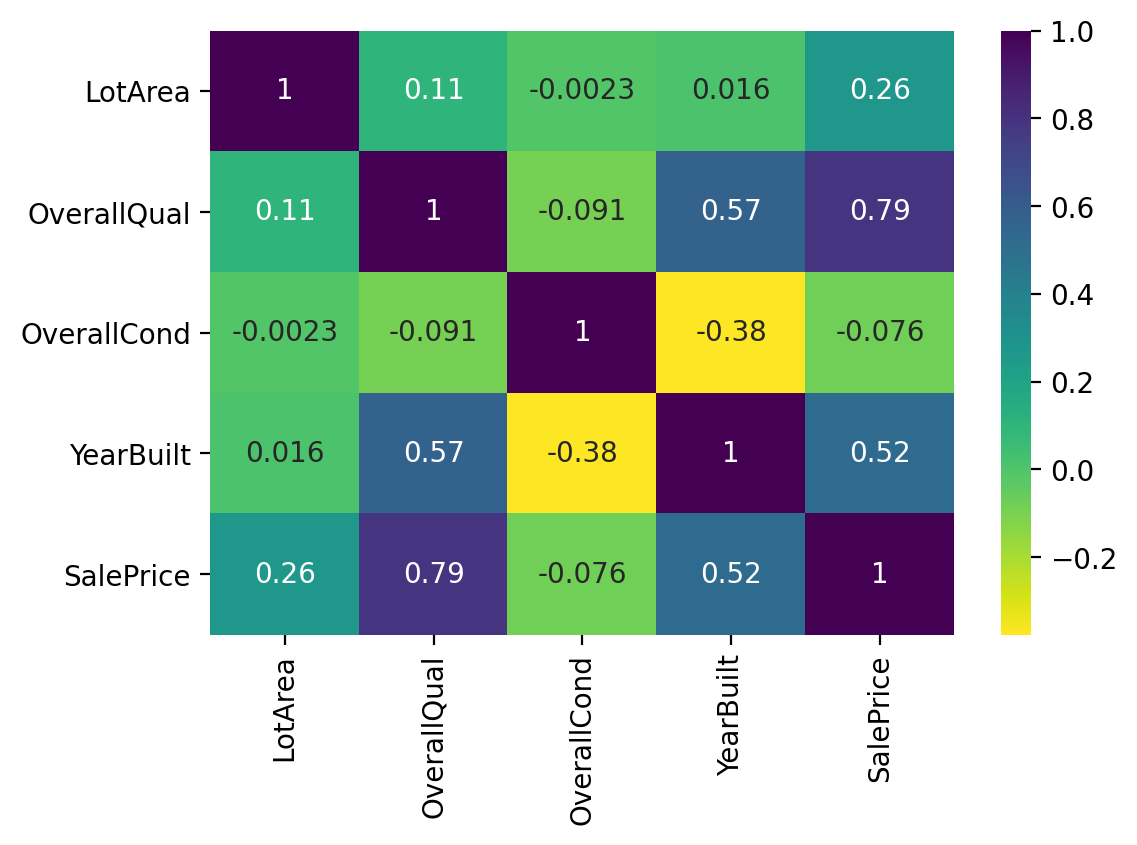

In [25]:
plt.figure(dpi=200)
sns.heatmap(df[['LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'SalePrice']].corr(), annot=True, cmap='viridis_r');

Here we are finding the correlation between different neighborhoods and the property sale price.

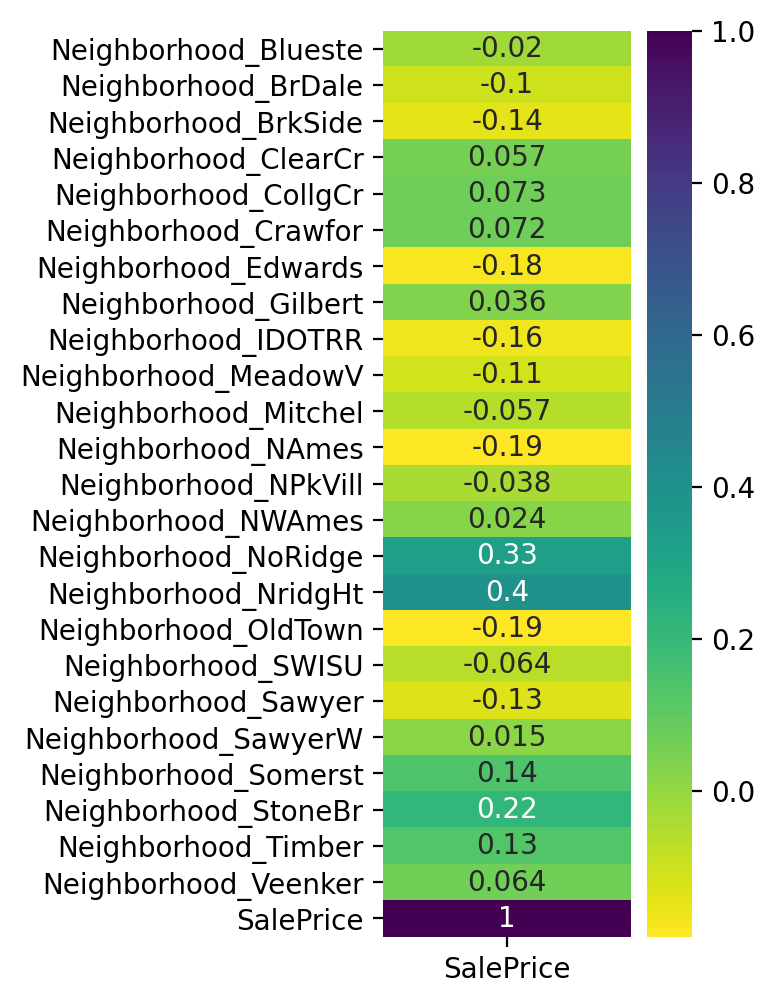

In [26]:
neigh=[]
for col in df.columns:
    if col[:2]=='Ne':
        neigh.append(col)
neigh.append('SalePrice')
plt.figure(dpi=200, figsize=(2,6))
myneigh=(df[neigh].corr())[['SalePrice']]
sns.heatmap(myneigh, annot=True, cmap='viridis_r');

Here we are finding the correlation between the PoolQC and the property sale price.

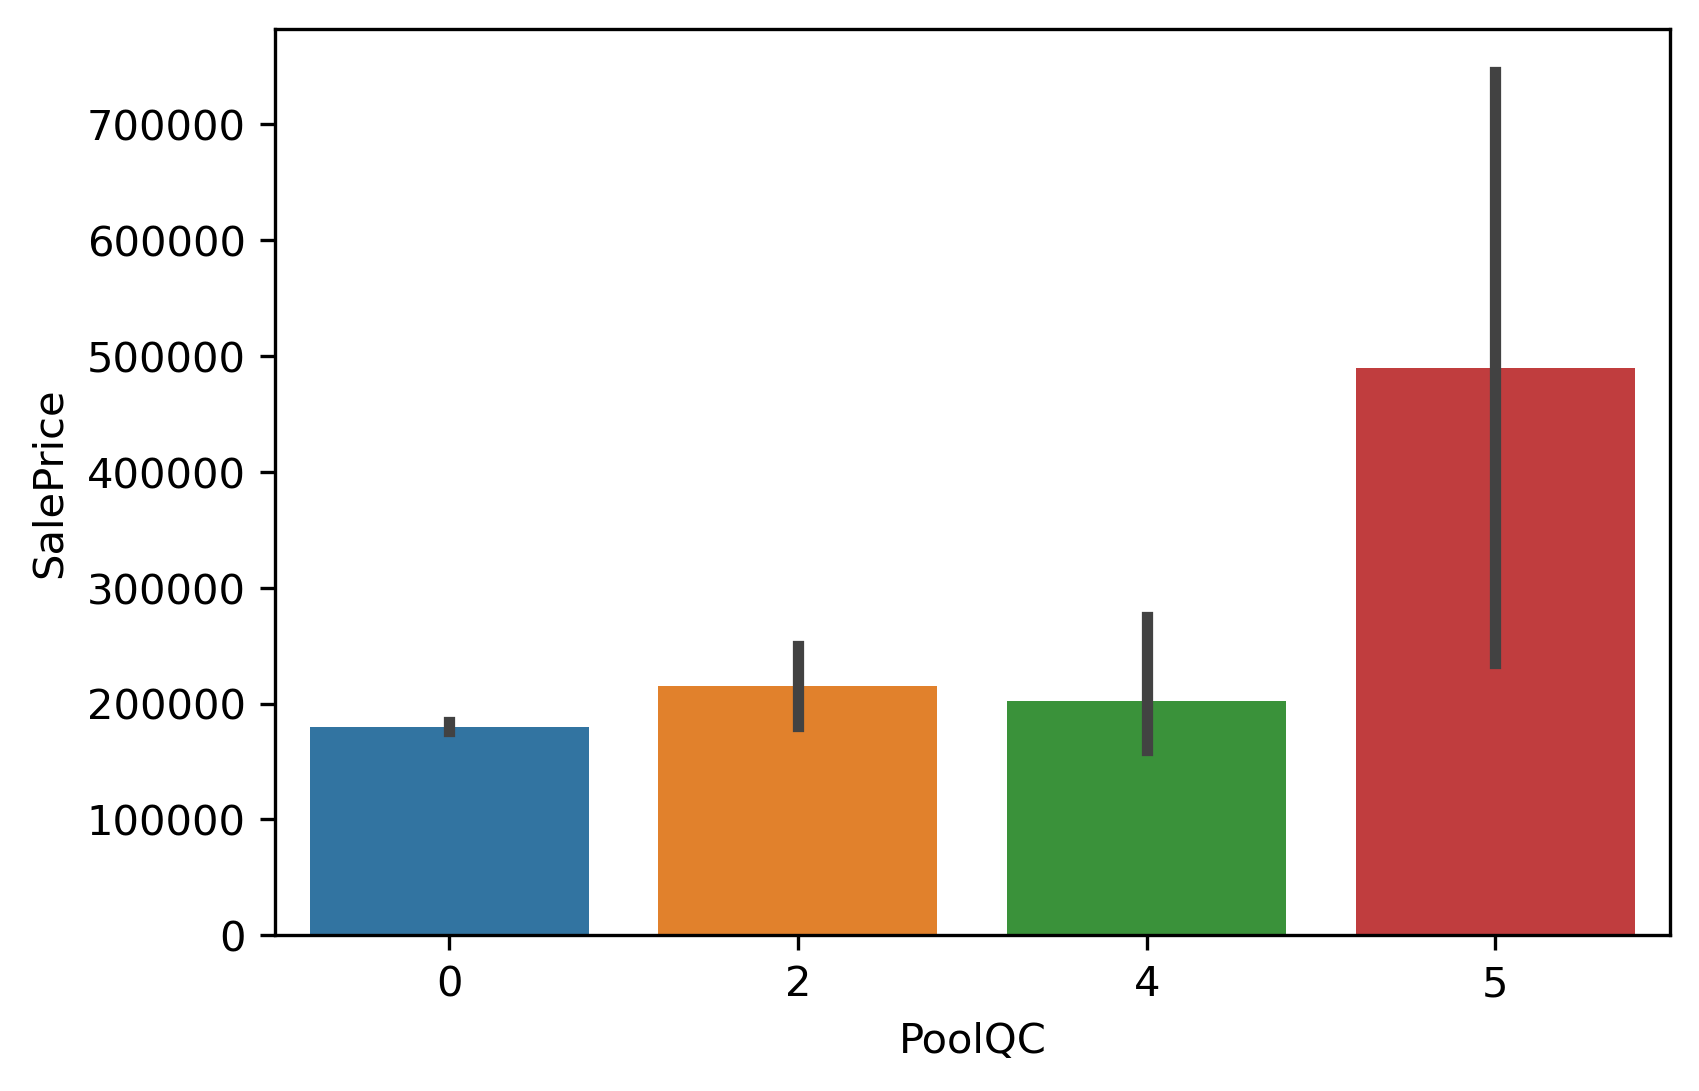

In [27]:
plt.figure(dpi=300)
sns.barplot(x=df.PoolQC, y=df.SalePrice);

Yes, having very good quality pool more than doubles the valuation of the property

Segregating <font color='navy'><b>predictor variables</b></font> and <font color='navy'><b>target variable</b></font>. We're subjecting the <font color='navy'><b>target variable</b></font> to <font color='navy'><b>log transformation</b></font>. Also we're doing <font color='navy'><b>train_test_split</b></font> in order to segregate a portion of data for final performance metrics.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_full=df.drop('SalePrice',axis=1)
y_full=np.log10(df.SalePrice)

# holding out 10% of the dataset for the final evaluation purposes
X, X_hold, y, y_hold=train_test_split(X_full, y_full, test_size=0.1, random_state=1106)

# <font color='navy'><u>Setting Up Pipelines</u></font>
Here we are going to import, instantiate and setup the scaling object, the learning algorithms and the pipeline object to create two separate pipelines, one for each learning algorithm. 

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.pipeline import Pipeline

In [31]:
# instantiating the StandardScaler
scale=StandardScaler()

In [32]:
# instantiating the Ridge object
l2_norm=Ridge()

In [33]:
# instantiating the Lasso object
l1_norm=Lasso()

In [34]:
# setting up sequence of operations for two pipelines
operation1=[('scale',scale),('l2_norm',l2_norm)]
operation2=[('scale',scale),('l1_norm',l1_norm)]

In [35]:
# creating two pipelines
pipe1=Pipeline(steps=operation1)
pipe2=Pipeline(steps=operation2)

# <font color='navy'><u>Model Building</u></font>
Finding the optimal strength of penalty (λ) in the case of both Ridge and Lasso is key to building robust model. Hence we are going to use GridSearchCV object to perform this hyperparameter tuning.

In [36]:
from sklearn.model_selection import GridSearchCV

# <font color='darkgreen'>Building Ridge Model: ridge</font>
As mentioned before, GridSearchCV will try different models and will select the best one. That best model is what we're going to choose as our <font color='darkgreen'><b>ridge</b></font> model.

In [37]:
'''Note: I'm searching for alpha in this extremely narrowspace. Because I've already run this code many times and wanted to 
fine tune my search for the best value. I also tried alpha=0 to rule out the possibility of plain OLS
'''
param_ridge={'l2_norm__alpha':np.logspace(2.65,2.7,100)}

In [38]:
grid_ridge=GridSearchCV(estimator=pipe1, param_grid=param_ridge, cv=5, scoring='r2', return_train_score=True)

In [39]:
grid_ridge.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('l2_norm', Ridge())]),
             param_grid={'l2_norm__alpha': array([446.68359215, 447.20335238, 447.72371741, 448.24468793,
       448.76626465, 449.28844828, 449.81123952, 450.33463907,
       450.85864766, 451.38326598, 451.90849474, 452.43433466,
       452.96078645, 453.48785081, 454.01552847, 454.54382013,
       455.07272651,...
       487.95956827, 488.52735715, 489.09580672, 489.66491773,
       490.23469095, 490.80512717, 491.37622714, 491.94799164,
       492.52042145, 493.09351733, 493.66728007, 494.24171044,
       494.81680922, 495.39257717, 495.96901509, 496.54612376,
       497.12390394, 497.70235643, 498.28148201, 498.86128145,
       499.44175555, 500.02290509, 500.60473085, 501.18723363])},
             return_train_score=True, scoring='r2')

In [40]:
grid_ridge.best_estimator_

Pipeline(steps=[('scale', StandardScaler()),
                ('l2_norm', Ridge(alpha=477.8514732339196))])

In [41]:
grid_ridge_results=pd.DataFrame(grid_ridge.cv_results_)
grid_ridge_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_l2_norm__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.018076,0.009521,0.002801,4.001618e-04,446.683592,{'l2_norm__alpha': 446.683592150963},0.848970,0.905281,0.885784,0.918042,...,0.869619,0.046131,100,0.919506,0.907248,0.913138,0.906599,0.928203,0.914939,0.008108
1,0.011203,0.000749,0.003001,9.536743e-08,447.203352,{'l2_norm__alpha': 447.20335238362566},0.848971,0.905270,0.885788,0.918042,...,0.869620,0.046126,99,0.919488,0.907231,0.913120,0.906580,0.928188,0.914922,0.008109
2,0.011803,0.000748,0.003201,3.999472e-04,447.723717,{'l2_norm__alpha': 447.72371740837025},0.848973,0.905260,0.885792,0.918043,...,0.869621,0.046122,98,0.919470,0.907214,0.913102,0.906561,0.928173,0.914904,0.008111
3,0.012003,0.000894,0.002801,4.000188e-04,448.244688,{'l2_norm__alpha': 448.24468792893083},0.848975,0.905249,0.885796,0.918043,...,0.869622,0.046117,97,0.919452,0.907197,0.913084,0.906542,0.928159,0.914887,0.008112
4,0.011203,0.000749,0.002800,4.000665e-04,448.766265,{'l2_norm__alpha': 448.76626464986174},0.848977,0.905238,0.885801,0.918044,...,0.869623,0.046113,96,0.919435,0.907180,0.913065,0.906523,0.928144,0.914869,0.008113


In [42]:
grid_ridge.best_score_

0.8696441893427125

The <b>r_squared</b> of the best ridge estimator is <b>87%</b>. Though we can use the above <b>grid_ridge</b> itself as the final Ridge model directly, we're creating a new Ridge object to conveniently use it for <b>RFE</b> and <b>residual analysis</b>.

In [43]:
grid_ridge.best_estimator_[1].alpha

477.8514732339196

<font color='darkgreen'><b> The optimal value of λ for Ridge regression is 477.85</b></font>

In [44]:
ridge=Ridge(grid_ridge.best_estimator_[1].alpha)

In [45]:
from sklearn.feature_selection import RFE

We're creating a temporary ridge based RFE with number of features as 1 to obtain a list of features and with their respective ranking

In [46]:
tmp_rfe_ridge1=RFE(ridge, n_features_to_select=1)

We have built the above Ridge model by using GridSearchCV in which we passed in a pipeline which automatically standardized the dataframe. But in order to do further analysis when we fit the Ridge model on the dataset, we'll have to manually standardize it. Hence the following transformation.

In [47]:
std=StandardScaler()

# fit_transforming the train set
# transforming the test set

X_std=std.fit_transform(X)
X_hold_std=std.transform(X_hold)

y_std=std.fit_transform(y.values.reshape(-1,1))
y_hold_std=std.transform(y_hold.values.reshape(-1,1))

In [48]:
tmp_rfe_ridge1.fit(X_std,y_std)

RFE(estimator=Ridge(alpha=477.8514732339196), n_features_to_select=1)

In [49]:
# checking the features & their RFE rank
l1=list(zip(X.columns,tmp_rfe_ridge1.ranking_))
l1.sort(key=lambda x:x[1])
l1=pd.DataFrame(l1)
l1.columns=['features_alpha','ranking_alpha']

In [50]:
ridge_2alpha=Ridge(2*grid_ridge.best_estimator_[1].alpha)

In [51]:
tmp_rfe_ridge2=RFE(ridge_2alpha, n_features_to_select=1)

In [52]:
tmp_rfe_ridge2.fit(X_std,y_std)

RFE(estimator=Ridge(alpha=955.7029464678392), n_features_to_select=1)

In [53]:
# checking the features & their RFE rank
l2=list(zip(X.columns,tmp_rfe_ridge2.ranking_))
l2.sort(key=lambda x:x[1])
l2=pd.DataFrame(l2)
l2.columns=['features_2alpha','ranking_2alpha']

<font color='red'><b>Here we are comparing the features and their respective RFE ranking with the optimal value of λ and its double the value 2λ. Note λ=α.</b></font>

In [54]:
compare_ridge=pd.concat([l1,l2],axis=1)
compare_ridge.head(10)

,features_alpha,ranking_alpha,features_2alpha,ranking_2alpha
0,OverallQual,1,OverallQual,1
1,GrLivArea,2,GrLivArea,2
2,GarageCars,3,GarageCars,3
3,KitchenQual,4,KitchenQual,4
4,BsmtQual,5,BsmtQual,5
5,1stFlrSF,6,1stFlrSF,6
6,YearBuilt,7,YearBuilt,7
7,FireplaceQu,8,Fireplaces,8
8,OverallCond,9,ExterQual,9
9,MSZoning_RL,10,TotRmsAbvGrd,10


<font color='darkgreen'><b>Here the top 7 important features are exactly same for both the versions of Ridge, though the ranking of other features have changed slightly.</b></font>

Our current Ridge model using the optimal value of <b>λ=477.85</b> is good, but it is also quite complex as it involves 215 predictor variables. Though we may be interested in performing feature elimination using RFE, we have to be aware that eliminating the features will result in decreased predictive ability and our predictive r2_score is 87% which is not super high. Hence we choose to use all the features.

# <font color='orange'>Residual Analysis (ridge)</font>

In [55]:
# fitting the data on the ridge regression object
ridge.fit(X_std,y_std)

Ridge(alpha=477.8514732339196)

In [56]:
# making predictions off of the data 
y_pred=ridge.predict(X_std)
y_pred

array([[-0.14376317],
       [-0.80330325],
       [-0.45551229],
       ...,
       [ 0.04120945],
       [-0.21650447],
       [-0.77278381]])

In [57]:
# defining residuals
res=y_std-y_pred
res

array([[ 0.06775451],
       [ 0.19809113],
       [ 0.23456409],
       ...,
       [ 0.03461353],
       [-0.13194022],
       [-0.00213176]])

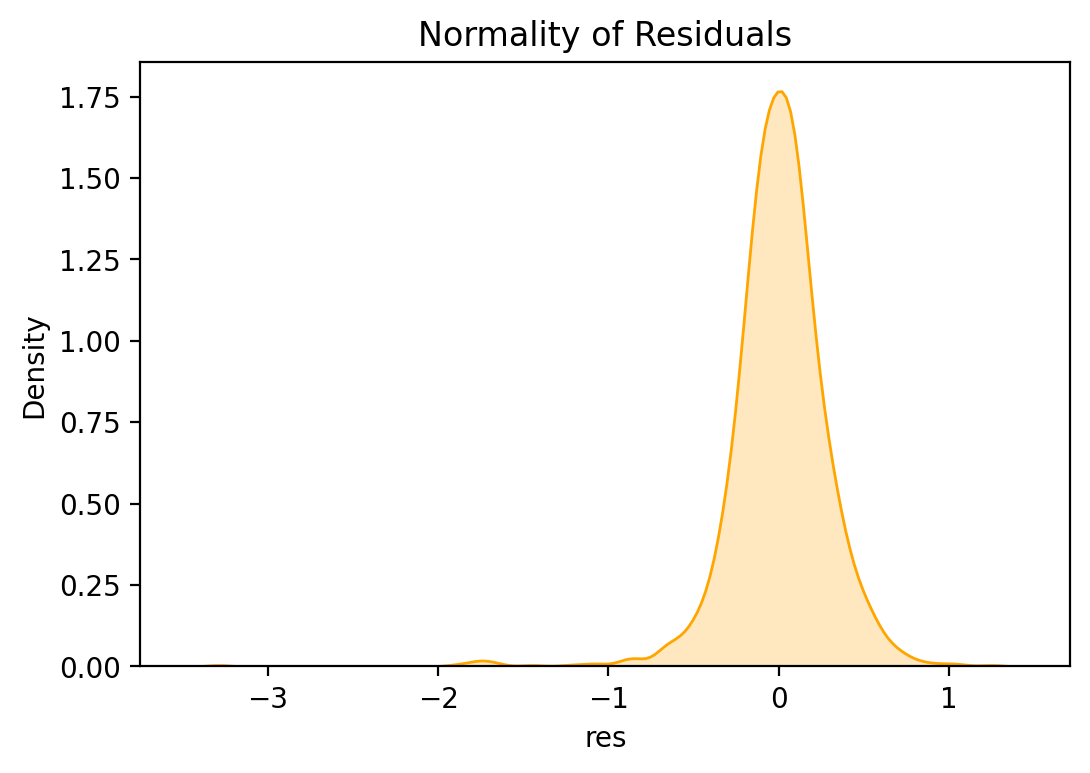

In [58]:
# plotting kdeplot for the residuals
plt.figure(dpi=200)
plt.title('Normality of Residuals')
sns.kdeplot(res.reshape(1,-1)[0], shade=True, color='Orange')
plt.xlabel('res');

From the above plot we can see that the residuals are fairly normal and centered around 0 which is one of the assumptions of linear regression.

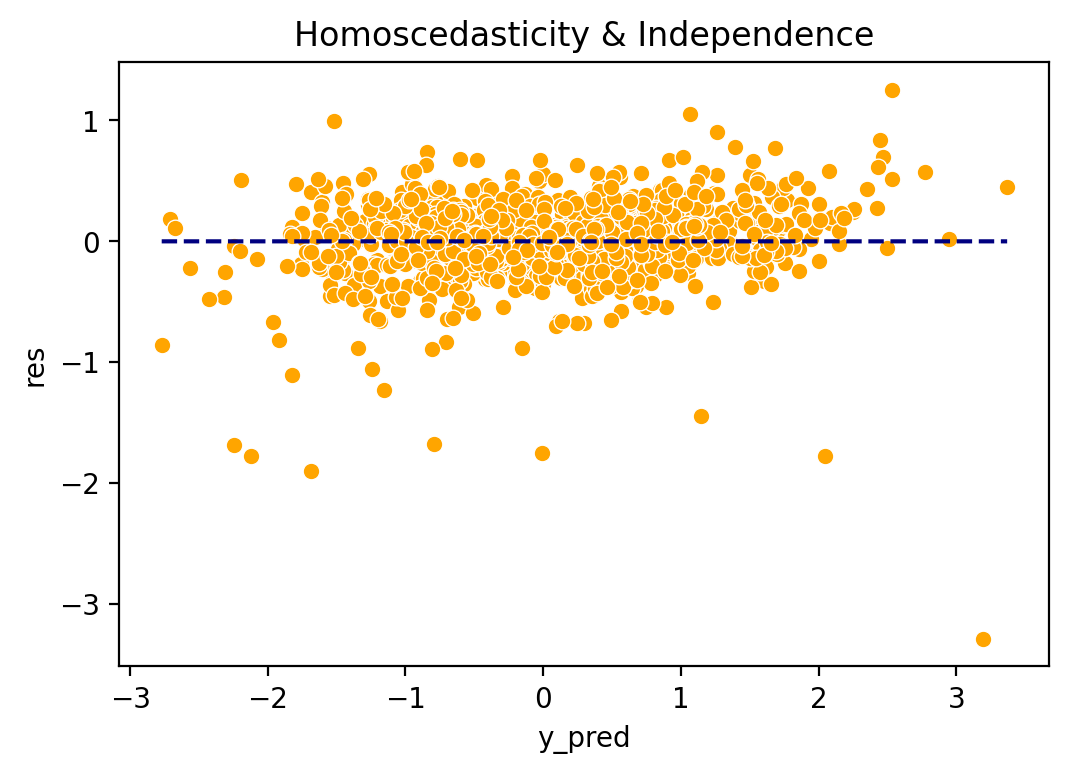

In [59]:
# plotting the residuals against the predicted values
plt.figure(dpi=200)
plt.title('Homoscedasticity & Independence')
sns.scatterplot(x=y_pred.reshape(1,-1)[0], y=res.reshape(1,-1)[0], color='Orange')
plt.ylabel('res')
plt.xlabel('y_pred')
sns.lineplot(x=y_pred.reshape(1,-1)[0], y=0, color='navy', ls='--');

Except for handful of points, residuals are having uniform variance (homoscedasticity) and residuals are independent. Hence all the 3 assumptions of linear regression about the residuals are satisfied.

<b><font color='navy'>Evaluating the performance of ridge model</font></b>

In [60]:
from sklearn.metrics import mean_absolute_error, r2_score

In [61]:
y_hold_pred=ridge.predict(X_hold_std)

In [62]:
r2_ridge_hold=r2_score(y_hold_std, y_hold_pred)
r2_ridge_hold

0.8817462833331254

In [63]:
# finding MAE in the original scale
# we're undoing log10 by 10**(num)
MAE=mean_absolute_error(10**y_hold, 10**std.inverse_transform(y_hold_pred))
MAE

17471.045833093154

The above <b>MAE</b> means that on an average our model's predictions are off from the true value by <b>$17471</b>. To put it in perspective, let us do the following.

In [64]:
# mean of all SalePrice
mean_sp= (10**y_hold).mean()
mean_sp

186457.7123287671

In [65]:
error_perc=100*(MAE/mean_sp)
error_perc

9.369977575552223

# <font color='darkviolet'>ridge Model Performance:</font>
<b><font color='darkviolet'>predictive r2_score=88%</font></b><br>
<b><font color='darkviolet'>On an average, the SalePrice predicted by this model are off by ±9.36 %</font></b>

# <font color='darkgreen'>Building Lasso Model: lasso</font>
As mentioned before, GridSearchCV will try different models and will select the best one. That best model is what we're going to choose as our <font color='darkgreen'><b>lasso</b></font> model.

In [66]:
'''Note: I'm searching for alpha in this extremely narrowspace. Because I've already run this code many times and wanted to 
fine tune my search for the best value. I also tried alpha=0 to rule out the possibility of plain OLS
'''
param_lasso={'l1_norm__alpha':np.logspace(-2.75,-2.7,100)}

In [67]:
grid_lasso=GridSearchCV(estimator=pipe2, param_grid=param_lasso, cv=5, scoring='r2', return_train_score=True)

In [68]:
grid_lasso.fit(X,y)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('l1_norm', Lasso())]),
             param_grid={'l1_norm__alpha': array([0.00177828, 0.00178035, 0.00178242, 0.00178449, 0.00178657,
       0.00178865, 0.00179073, 0.00179281, 0.0017949 , 0.00179699,
       0.00179908, 0.00180117, 0.00180327, 0.00180537, 0.00180747,
       0.00180957, 0.00181168, 0.00181379, 0.0018159 , 0.00181801,
       0.0...
       0.00192909, 0.00193134, 0.00193359, 0.00193584, 0.00193809,
       0.00194034, 0.0019426 , 0.00194486, 0.00194713, 0.00194939,
       0.00195166, 0.00195393, 0.0019562 , 0.00195848, 0.00196076,
       0.00196304, 0.00196532, 0.00196761, 0.0019699 , 0.00197219,
       0.00197449, 0.00197679, 0.00197909, 0.00198139, 0.00198369,
       0.001986  , 0.00198831, 0.00199063, 0.00199294, 0.00199526])},
             return_train_score=True, scoring='r2')

In [69]:
grid_lasso.best_estimator_

Pipeline(steps=[('scale', StandardScaler()),
                ('l1_norm', Lasso(alpha=0.0019001499684190594))])

In [70]:
grid_lasso_results=pd.DataFrame(grid_lasso.cv_results_)
grid_lasso_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_l1_norm__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015403,8.000374e-04,0.002001,1.784161e-07,0.001778,{'l1_norm__alpha': 0.0017782794100389228},0.837794,0.917228,0.881044,0.920110,...,0.865207,0.056239,100,0.920707,0.908771,0.915110,0.908556,0.928344,0.916297,0.007517
1,0.015003,9.536743e-08,0.002201,4.001856e-04,0.00178,{'l1_norm__alpha': 0.0017803486127948383},0.837793,0.917227,0.881057,0.920133,...,0.865212,0.056247,99,0.920690,0.908756,0.915092,0.908531,0.928330,0.916280,0.007520
2,0.015003,1.507891e-07,0.002801,4.001141e-04,0.001782,{'l1_norm__alpha': 0.001782420223271399},0.837791,0.917226,0.881069,0.920156,...,0.865217,0.056255,98,0.920672,0.908740,0.915074,0.908507,0.928317,0.916262,0.007522
3,0.015203,4.002095e-04,0.002001,2.780415e-07,0.001784,{'l1_norm__alpha': 0.0017844942442702206},0.837790,0.917225,0.881082,0.920179,...,0.865222,0.056263,97,0.920655,0.908725,0.915056,0.908482,0.928304,0.916244,0.007525
4,0.015003,6.327113e-04,0.002201,4.002571e-04,0.001787,{'l1_norm__alpha': 0.0017865706785961841},0.837788,0.917223,0.881095,0.920201,...,0.865227,0.056271,96,0.920637,0.908710,0.915038,0.908457,0.928291,0.916227,0.007527


In [71]:
grid_lasso.best_score_

0.8654285616959271

The <b>r_squared</b> of the best lasso estimator is <b>87%</b>. Though we can use the above <b>grid_lasso</b> itself as the final Lasso model directly, we're creating a new Lasso object to conveniently use it for <b>RFE</b> and <b>residual analysis</b>.

<b>Note: <font color='red'>Lasso itself is a feature selecting algorithm and applying RFE on a Lasso model is redundant. But still we're using RFE on Lasso, because of one of its attributes called ranking_ which will give us the significance of each feature in the model.</b></font>

In [72]:
grid_lasso.best_estimator_[1].alpha

0.0019001499684190594

<font color='darkgreen'><b> The optimal value of λ for Lasso regression is 0.0019</b></font>

In [73]:
lasso=Lasso(grid_lasso.best_estimator_[1].alpha)
lasso

Lasso(alpha=0.0019001499684190594)

In [74]:
tmp_rfe_lasso1=RFE(lasso, n_features_to_select=1)

In [75]:
tmp_rfe_lasso1.fit(X_std,y_std)

RFE(estimator=Lasso(alpha=0.0019001499684190594), n_features_to_select=1)

In [76]:
# checking the features & their RFE rank
l3=list(zip(X.columns,tmp_rfe_lasso1.ranking_))
l3.sort(key=lambda x:x[1])
l3=pd.DataFrame(l3)
l3.columns=['features_alpha','ranking_alpha']

In [77]:
lasso_2alpha=Lasso(2*grid_lasso.best_estimator_[1].alpha)

In [78]:
tmp_rfe_lasso2=RFE(lasso_2alpha, n_features_to_select=1)

In [79]:
tmp_rfe_lasso2.fit(X_std,y_std)

RFE(estimator=Lasso(alpha=0.003800299936838119), n_features_to_select=1)

In [80]:
# checking the features & their RFE rank
l4=list(zip(X.columns,tmp_rfe_lasso2.ranking_))
l4.sort(key=lambda x:x[1])
l4=pd.DataFrame(l4)
l4.columns=['features_2alpha','ranking_2alpha']

<font color='red'><b>Here we are comparing the features and their respective RFE ranking with the optimal value of λ and its double the value 2λ. Note λ=α.</b></font>

In [81]:
compare_lasso=pd.concat([l3,l4],axis=1)
compare_lasso.head(10)

,features_alpha,ranking_alpha,features_2alpha,ranking_2alpha
0,OverallQual,1,OverallQual,1
1,GrLivArea,2,GrLivArea,2
2,YearBuilt,3,YearBuilt,3
3,OverallCond,4,GarageCars,4
4,TotalBsmtSF,5,OverallCond,5
5,RoofMatl_CompShg,6,TotalBsmtSF,6
6,RoofMatl_Tar&Grv,7,MSZoning_RL,7
7,RoofMatl_WdShngl,8,RoofMatl_CompShg,8
8,RoofMatl_Metal,9,RoofMatl_Tar&Grv,9
9,RoofMatl_Membran,10,RoofMatl_WdShngl,10


<font color='darkgreen'><b>The top 3 most important features for optimal λ version of Lasso and 2λ version of Lasso are exactly same. They are OverallQual, GrLivArea & YearBuilt. The ranking of all other features are quite different between both the versions of Lasso.</b></font>

We are using our current Lasso model using the optimal value of <b>λ=0.0019</b> to perform further analysis.

# <font color='orange'>Residual Analysis (lasso)</font>

In [82]:
# fitting the data on the ridge regression object
lasso.fit(X_std,y_std)

Lasso(alpha=0.0019001499684190594)

In [83]:
# making predictions off of the data 
y_pred_lasso=lasso.predict(X_std)
y_pred_lasso

array([-0.15241297, -0.81606443, -0.36923842, ...,  0.04014383,
       -0.24537451, -0.73063997])

In [84]:
# defining residuals
res_lasso=y_std-y_pred_lasso.reshape(-1,1)
res_lasso=res_lasso.reshape(1,-1)[0]
res_lasso

array([ 0.07640431,  0.21085231,  0.14829022, ...,  0.03567915,
       -0.10307017, -0.04427559])

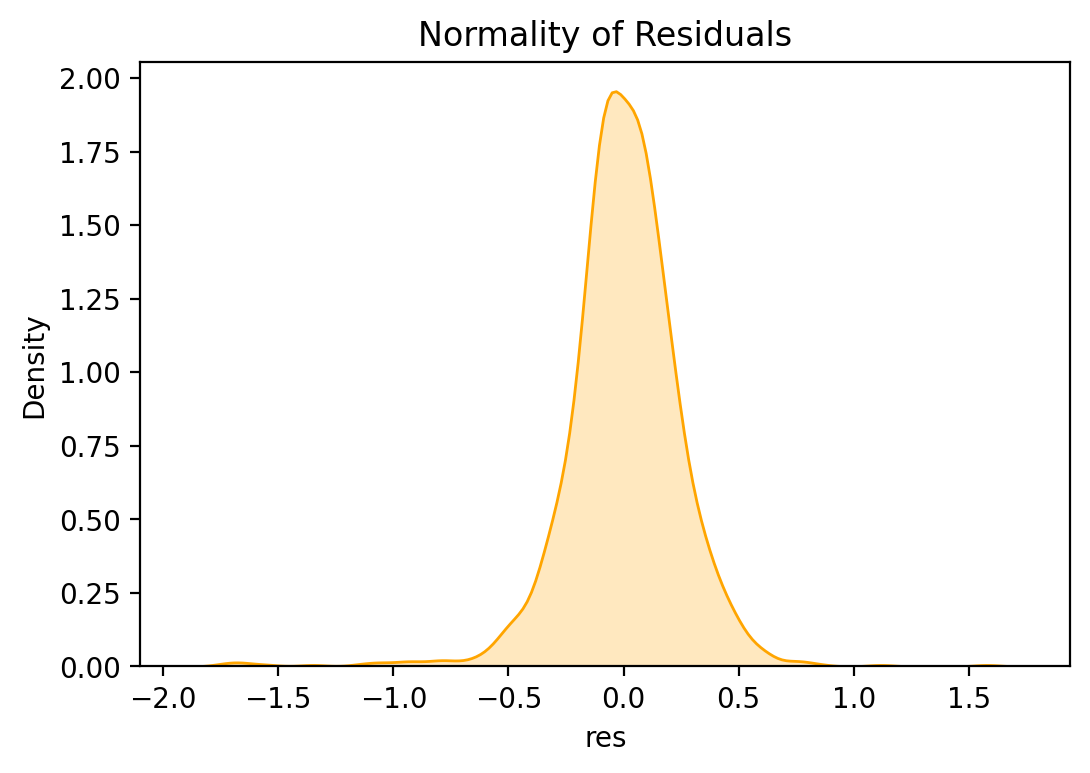

In [85]:
# plotting kdeplot for the residuals
plt.figure(dpi=200)
plt.title('Normality of Residuals')
sns.kdeplot(res_lasso, shade=True, color='Orange')
plt.xlabel('res');

From the above plot we can see that the residuals are fairly normal and centered around 0 which is one of the assumptions of linear regression.

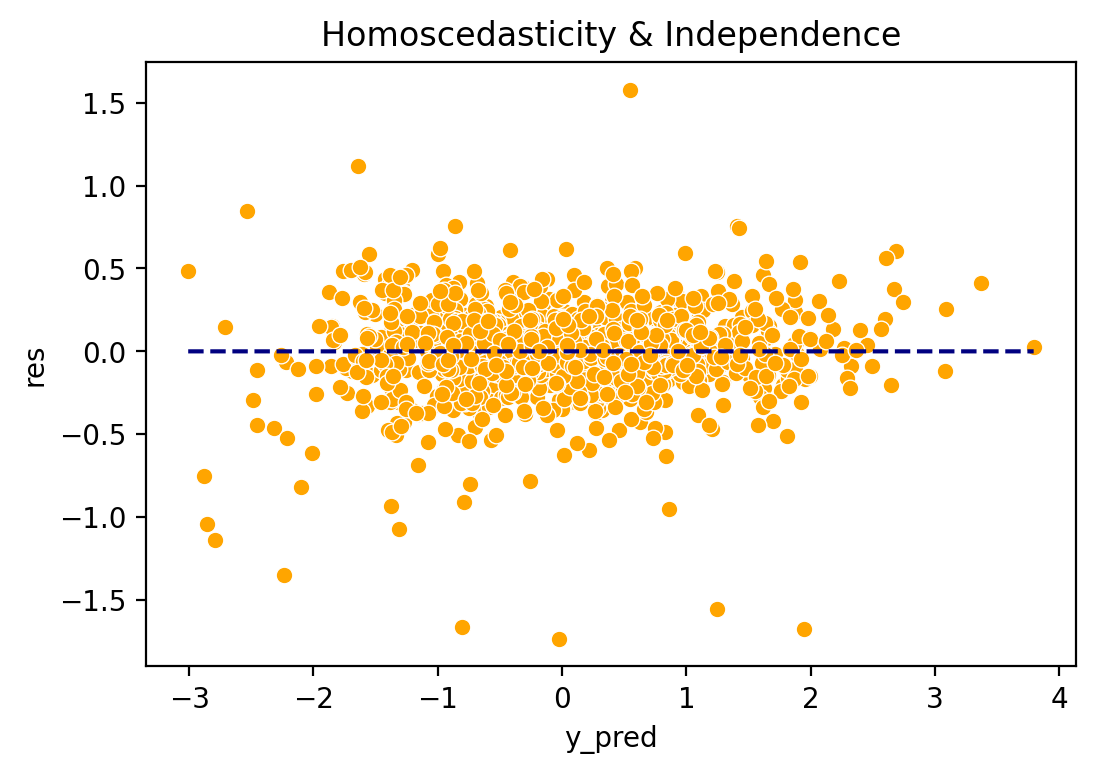

In [86]:
# plotting the residuals against the predicted values
plt.figure(dpi=200)
plt.title('Homoscedasticity & Independence')
sns.scatterplot(x=y_pred_lasso, y=res_lasso, color='Orange')
plt.ylabel('res')
plt.xlabel('y_pred')
sns.lineplot(x=y_pred_lasso, y=0, color='navy', ls='--');

Except for handful of points, residuals are having uniform variance (homoscedasticity) and residuals are independent. Hence all the 3 assumptions of linear regression about the residuals are satisfied.

<b><font color='navy'>Evaluating the performance of ridge model</font></b>

In [87]:
y_hold_pred_lasso=lasso.predict(X_hold_std)

In [88]:
r2_score(y_hold_std, y_hold_pred_lasso)

0.900613925026784

In [89]:
# finding MAE in the original scale
# we're undoing log10 by 10**(num)
MAE_lasso=mean_absolute_error(10**y_hold,10**std.inverse_transform(y_hold_pred_lasso.reshape(1,-1))[0])
MAE_lasso

15331.1672817502

The above <b>MAE_lasso</b> means that on an average our model's predictions are off from the true value by <b>$15331</b>. To put it in perspective, let us do the following.

In [90]:
error_perc_lasso=100*(MAE_lasso/mean_sp)
error_perc_lasso

8.222329390547218

# <font color='darkviolet'>lasso Model Performance:</font>
<b><font color='darkviolet'>predictive r2_score=90%</font></b><br>
<b><font color='darkviolet'>On an average, the SalePrice predicted by this model are off by ±8.22 %</font></b>

# <font color='darkgreen'>Model Performance Comparison:</font>

In [91]:
(ridge.coef_!=0).sum()

215

Ridge uses all 215 predictor variables.

In [92]:
(lasso.coef_!=0).sum()

161

Lasso uses only 161 predictor variables. Hence it is a lighter model.

# <font color='navy'><u>Final Model</u></font>

<b>Therefore we choose <font color='darkviolet'>lasso model</font> as our final model, as its <font color='darkviolet'>predictive r2_score</font> is <font color='darkviolet'>90%</font> <font color='grey'>(which is slightly better than that of ridge with 88%)</font> and it uses only <font color='darkviolet'>161 features</font> thus it is significantly lighter than the ridge model.</b> 

You can find the coefficients of the features and the constant terms in the following dataframe for your reference.

In [93]:
lasso_coef=list(zip(X.columns, lasso.coef_))
lasso_coef=pd.DataFrame(lasso_coef)
lasso_coef

,0,1
0,LotArea,0.053028
1,Street,0.015095
2,Alley,0.010278
3,Utilities,0.014307
4,OverallQual,0.162949
...,...,...
210,SaleCondition_AdjLand,0.013807
211,SaleCondition_Alloca,0.006489
212,SaleCondition_Family,-0.000000
213,SaleCondition_Normal,0.056184
